In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('./2022_MALABON DATA SHEETS_UPDATED_TRIX_21FEB2024.xlsx')
df.head()

,DISTRICT,BARANGAY,CLUSTERED PRECINCT,POLLING CENTER,PRECINCT NO.,CLUSTERED PRECINCT ID,NO. OF REGISTERED VOTERS,TURN OUT,Unnamed: 8,TOV,...,KKM (Women's),LAKAS (Political),THUNDERS (Political),SANGLAHI (LGBT),BATANG LACSON (Youth),WARRIORS (Political),REPUBLIKA (Political),Social Services Recipients,Total JORG Members,Influence
0,1,SAN AGUSTIN,1.0,Dela Paz ES,"0001A, 0001B,0002A, 0002B",75020001.0,766.0,585.0,NaN,585.0,...,56.0,21.0,21.0,11.0,4.0,30.0,NaN,83.0,143.0,2.300699
1,1,SAN AGUSTIN,2.0,Dela Paz ES,"0003A, 0003B,0004A, 0004B",75020002.0,762.0,527.0,NaN,527.0,...,73.0,22.0,16.0,4.0,11.0,8.0,NaN,84.0,134.0,2.231343
2,1,SAN AGUSTIN,3.0,Dela Paz ES,"0005A, 0005B,0006A, 0006B",75020003.0,747.0,556.0,NaN,556.0,...,34.0,11.0,38.0,0.0,2.0,12.0,NaN,29.0,97.0,3.000000
3,1,SAN AGUSTIN,4.0,Dela Paz ES,"0007A, 0008A,0009A, 0010A",75020004.0,759.0,533.0,NaN,533.0,...,21.0,11.0,44.0,3.0,1.0,16.0,NaN,35.0,96.0,3.010417
4,1,SAN AGUSTIN,5.0,Dela Paz ES,"0011A, 0012A,0012B, 0012C",75020005.0,770.0,546.0,NaN,546.0,...,9.0,30.0,79.0,3.0,1.0,13.0,NaN,52.0,135.0,2.488889


In [3]:
df.describe()

,CLUSTERED PRECINCT,CLUSTERED PRECINCT ID,NO. OF REGISTERED VOTERS,TURN OUT,Unnamed: 8,TOV,JAYE LACSON NOEL,RICKY SANDOVAL,Unnamed: 12,JEANNIE SANDOVAL,...,KKM (Women's),LAKAS (Political),THUNDERS (Political),SANGLAHI (LGBT),BATANG LACSON (Youth),WARRIORS (Political),REPUBLIKA (Political),Social Services Recipients,Total JORG Members,Influence
count,377.000000,3.550000e+02,377.000000,377.000000,0.0,377.000000,377.000000,377.000000,0.0,377.000000,...,377.000000,377.000000,377.000000,376.000000,377.000000,377.000000,191.000000,377.000000,356.000000,355.000000
mean,169.496021,7.692210e+07,2053.965517,1561.416446,NaN,1559.315650,814.217507,637.312997,NaN,754.583554,...,91.010610,82.885942,66.867374,8.593085,13.289125,27.525199,46.916230,124.846154,102.421348,3.365790
std,106.690174,3.583495e+07,13631.041581,10357.146877,NaN,10343.534053,5386.752200,4246.716534,NaN,5020.016808,...,605.908378,555.042729,444.809083,57.134619,88.202914,183.440364,235.158722,823.515500,41.646088,2.317555
min,1.000000,7.502000e+07,451.000000,265.000000,NaN,265.000000,119.000000,110.000000,NaN,128.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.110345
25%,74.000000,7.502009e+07,706.000000,530.000000,NaN,530.000000,262.000000,198.000000,NaN,237.000000,...,16.000000,16.000000,13.000000,1.000000,2.000000,2.000000,8.000000,29.000000,73.000000,2.252041
50%,168.000000,7.502018e+07,762.000000,569.000000,NaN,569.000000,293.000000,232.000000,NaN,277.000000,...,27.000000,28.000000,22.000000,3.000000,4.000000,7.000000,15.000000,42.000000,98.000000,2.801724
75%,262.000000,7.502027e+07,781.000000,597.000000,NaN,597.000000,328.000000,264.000000,NaN,304.000000,...,48.000000,41.000000,35.000000,5.000000,7.000000,15.000000,23.500000,60.000000,129.000000,3.865162
max,355.000000,7.502023e+08,258115.000000,196218.000000,NaN,195954.000000,102320.000000,80089.000000,NaN,94826.000000,...,11437.000000,10416.000000,8403.000000,1077.000000,1670.000000,3459.000000,2987.000000,15689.000000,290.000000,34.200000


In [11]:
print('Influence Ratio vs JORG Member Count')
xs, ys = [], []
for i in range(1, 35):
    x = f'{i}, {i}.9'
    y = df[(df['Influence'] >= i) & (df['Influence'] < i+1)]['Total  JORG Members'].sum()
    xs.append(x)
    ys.append(y)
    print(f'({x}): ',  int(y))

Influence Ratio vs JORG Member Count
(1, 1.9):  8598
(2, 2.9):  16630
(3, 3.9):  6955
(4, 4.9):  2043
(5, 5.9):  1538
(6, 6.9):  240
(7, 7.9):  206
(8, 8.9):  142
(9, 9.9):  0
(10, 10.9):  29
(11, 11.9):  44
(12, 12.9):  0
(13, 13.9):  0
(14, 14.9):  27
(15, 15.9):  0
(16, 16.9):  0
(17, 17.9):  0
(18, 18.9):  0
(19, 19.9):  0
(20, 20.9):  0
(21, 21.9):  0
(22, 22.9):  0
(23, 23.9):  0
(24, 24.9):  0
(25, 25.9):  0
(26, 26.9):  0
(27, 27.9):  0
(28, 28.9):  0
(29, 29.9):  0
(30, 30.9):  0
(31, 31.9):  0
(32, 32.9):  0
(33, 33.9):  0
(34, 34.9):  10


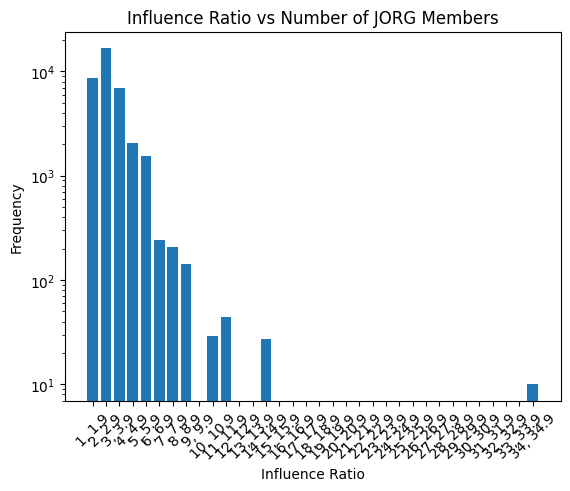

In [13]:
plt.bar(xs, ys)
plt.xlabel('Influence Ratio')
plt.title('JORG Member Frequency')
plt.title('Influence Ratio vs Number of JORG Members')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

number of precincts vs range
Ano ba gusto nating alamin?
yung gusto ni Peddy??
may x3 multiplier sa kada JORG member

In [27]:
df[(df['Influence'] <= 1.9) & (df['Influence'] >= 1)]['Total  JORG Members'].sum()

6412.0

In [8]:
df.columns

Index(['DISTRICT', 'BARANGAY', 'CLUSTERED PRECINCT', 'POLLING CENTER',
       'PRECINCT NO.', 'CLUSTERED PRECINCT ID', 'NO. OF REGISTERED VOTERS',
       'TURN OUT', 'Unnamed: 8', 'TOV', 'JAYE LACSON NOEL', 'RICKY SANDOVAL',
       'Unnamed: 12', 'JEANNIE SANDOVAL', 'ENZO ORETA', 'NINO LACSON NOEL',
       'KKM (Women's)', 'LAKAS (Political)', 'THUNDERS (Political)',
       'SANGLAHI (LGBT)', 'BATANG LACSON (Youth)', 'WARRIORS (Political)',
       'REPUBLIKA (Political)', 'Social Services Recipients',
       'Total  JORG Members', 'Influence'],
      dtype='object')

In [39]:
df[df['Total  JORG Members'] == 0].shape[0]

1

In [47]:
df[df['Influence'] < 2].shape[0]

54

In [71]:
df[(df['Influence'] < 1.7)]['Total  JORG Members'].sum()

3289.0

In [72]:
df[(df['Influence'] < 1.7)].shape[0]

18

In [59]:
for i in range(1, 10):
    if i < 9:
        
    else:
        

336